# Emotion Detection - Charan Sumanth Pulleti

In [1]:
import pandas as pd

## Unzipping the Dataset

In [2]:
import zipfile
import os

zip_file_path = "C:/Users/chara/Downloads/archive (1).zip"

extract_dir = "C:/Users/chara/Downloads/New_Dataset"

if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset has been successfully extracted to:", extract_dir)

Dataset has been successfully extracted to: C:/Users/chara/Downloads/New_Dataset


In [3]:
dataset_dir  = "C:/Users/chara/Downloads/New_Dataset"

## Understanding the Files in the Dataset

In [4]:
files = os.listdir(dataset_dir)

csv_files = [file for file in files if file.endswith('.csv')]

train_file = [file for file in csv_files if 'train' in file.lower()][0]  
train_data = pd.read_csv(os.path.join(dataset_dir, train_file))

val_file = [file for file in csv_files if 'val' in file.lower()][0]  
val_data = pd.read_csv(os.path.join(dataset_dir, val_file))

test_file = [file for file in csv_files if 'test' in file.lower()][0]  
test_data = pd.read_csv(os.path.join(dataset_dir, test_file))

## Train Data

In [5]:
print("Training Data:")
print(train_data.head())

Training Data:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [7]:
train_data.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [8]:
duplicate_rows = train_data[train_data.duplicated()]

if duplicate_rows.empty:
    print("No duplicate entries found.")
else:
    print("Duplicate entries found. Total duplicates:", len(duplicate_rows))

Duplicate entries found. Total duplicates: 1


In [9]:
train_data.drop_duplicates(inplace=True)

print("Duplicate entry removed. New shape of training data:", train_data.shape)

Duplicate entry removed. New shape of training data: (15999, 2)


In [10]:
labels_dict = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

train_data['description'] = train_data['label'].map(labels_dict)

print("Updated training data with description:")
print(train_data.head())

Updated training data with description:
                                                text  label description
0                            i didnt feel humiliated      0     sadness
1  i can go from feeling so hopeless to so damned...      0     sadness
2   im grabbing a minute to post i feel greedy wrong      3       anger
3  i am ever feeling nostalgic about the fireplac...      2        love
4                               i am feeling grouchy      3       anger


## Test Data

In [11]:
print(test_data.head())

                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0


In [12]:
duplicate_rows = test_data[test_data.duplicated()]

if duplicate_rows.empty:
    print("No duplicate entries found.")
else:
    print("Duplicate entries found. Total duplicates:", len(duplicate_rows))

No duplicate entries found.


## Validation Data

In [13]:
print(val_data.head())

                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cranky and blue      3
4  i can have for a treat or if i am feeling festive      1


In [14]:
duplicate_rows = val_data[val_data.duplicated()]

if duplicate_rows.empty:
    print("No duplicate entries found.")
else:
    print("Duplicate entries found. Total duplicates:", len(duplicate_rows))

No duplicate entries found.


## Splitting the Data

In [15]:
X_train = train_data['text']
y_train = train_data['label']

X_test = test_data['text']
y_test = test_data['label']

X_val = val_data['text']
y_val = val_data['label']

print("Training data - Features shape:", X_train.shape)
print("Training data - Labels shape:", y_train.shape)
print("Testing data - Features shape:", X_test.shape)
print("Testing data - Labels shape:", y_test.shape)
print("Validation data - Features shape:", X_val.shape)
print("Validation data - Labels shape:", y_val.shape)

Training data - Features shape: (15999,)
Training data - Labels shape: (15999,)
Testing data - Features shape: (2000,)
Testing data - Labels shape: (2000,)
Validation data - Features shape: (2000,)
Validation data - Labels shape: (2000,)


In [16]:
max_vocab_size = 10000  
max_seq_length = 100   
num_classes = 6         
num_epochs = 10      

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_seq_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

## 1. LSTM Model

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.optimizers import Adam

num_words = len(tokenizer.word_index) + 1 
max_sequence_length = max(len(seq) for seq in X_train_pad)

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=100, input_length=max_sequence_length))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(6, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()

history = lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val))

test_loss, test_accuracy = lstm_model.evaluate(X_test_pad, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10


250/250 [==============================] - 76s 261ms/step - loss: 1.3714 - accuracy: 0.4669 - val_loss: 0.8430 - val_accuracy: 0.7315
Epoch 2/10
250/250 [==============================] - 63s 252ms/step - loss: 0.5247 - accuracy: 0.8309 - val_loss: 0.3685 - val_accuracy: 0.8795
Epoch 3/10
250/250 [==============================] - 63s 251ms/step - loss: 0.2200 - accuracy: 0.9290 - val_loss: 0.2799 - val_accuracy: 0.9045
Epoch 4/10
250/250 [==============================] - 62s 248ms/step - loss: 0.1339 - accuracy: 0.9567 - val_loss: 0.2513 - val_accuracy: 0.9155
Epoch 5/10
250/250 [==============================] - 63s 251ms/step - loss: 0.0996 - accuracy: 0.9687 - val_loss: 0.2538 - val_accuracy: 0.9195
Epoch 6/10
250/250 [==============================] - 63s 251ms/step - loss: 0.0875 - accuracy: 0.9706 - val_loss: 0.2794 - val_accuracy: 0.9110
Epoch 7/10
250/250 [==============================] - 61s 246ms/step - loss: 0.0686 - accuracy: 0.9779 - val_loss: 0.2764 - val

In [19]:
predictions = lstm_model.predict(X_test_pad)

predicted_labels = predictions.argmax(axis=1)

for i in range(10):
    print("Text:", X_test[i])
    print("True Label:", y_test[i])
    print("Predicted Label:", predicted_labels[i])
    print()

63/63 [==============================] - 2s 25ms/step
Text: im feeling rather rotten so im not very ambitious right now
True Label: 0
Predicted Label: 0

Text: im updating my blog because i feel shitty
True Label: 0
Predicted Label: 0

Text: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
True Label: 0
Predicted Label: 0

Text: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
True Label: 1
Predicted Label: 1

Text: i was feeling a little vain when i did this one
True Label: 0
Predicted Label: 0

Text: i cant walk into a shop anywhere where i do not feel uncomfortable
True Label: 4
Predicted Label: 4

Text: i felt anger when at the end of a telephone call
True Label: 3
Predicted Label: 3

Text: i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the maste

63/63 [==============================] - 2s 24ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       550
           1       0.94      0.93      0.93       704
           2       0.84      0.83      0.83       178
           3       0.90      0.95      0.92       275
           4       0.92      0.85      0.89       212
           5       0.86      0.80      0.83        81

    accuracy                           0.92      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.92      0.92      0.92      2000



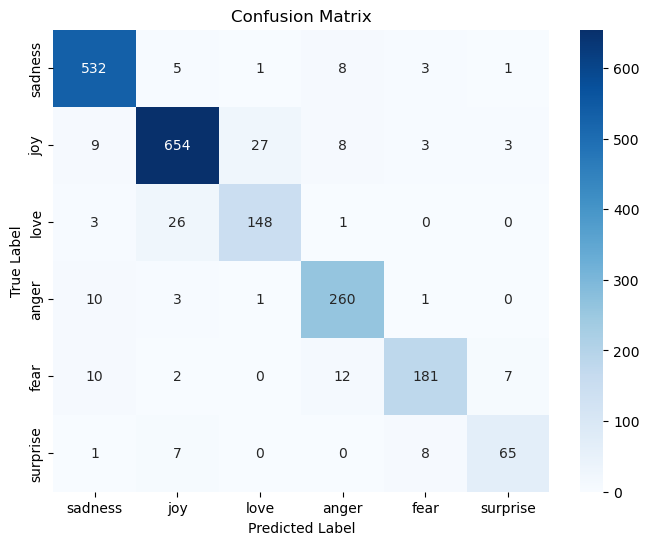

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

val_predictions = lstm_model.predict(X_val_pad)
val_predicted_labels = val_predictions.argmax(axis=1)

print(classification_report(y_val, val_predicted_labels))

cm = confusion_matrix(y_val, val_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Misclassified Text

Text: i don t feel particularly agitated
True Label: 4
Predicted Label: 3

Text: i pay attention it deepens into a feeling of being invaded and helpless
True Label: 4
Predicted Label: 0

Text: im not sure the feeling of loss will ever go away but it may dull to a sweet feeling of nostalgia at what i shared in this life with my dad and the luck i had to have a dad for years
True Label: 0
Predicted Label: 1

Text: i feel very honoured to be included in a magzine which prioritises health and clean living so highly im curious do any of you read magazines concerned with health and clean lifestyles such as the green parent
True Label: 1
Predicted Label: 5

Text: i feel a bit stressed even though all the things i have going on are fun
True Label: 3
Predicted Label: 0



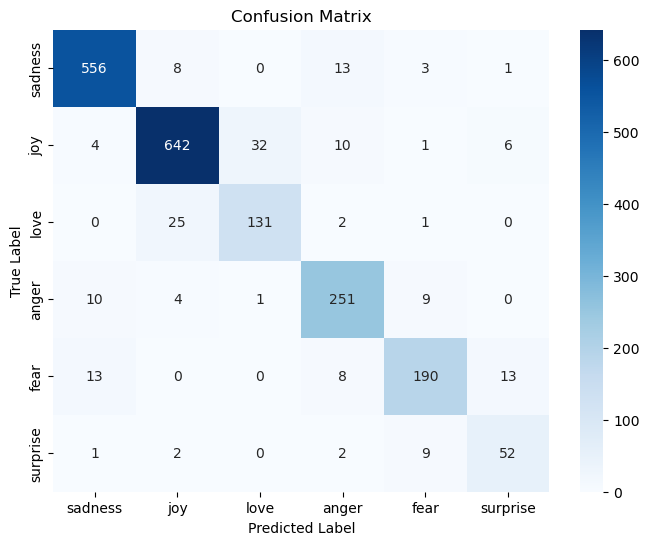

In [21]:
import numpy as np
misclassified_indices = np.where(predicted_labels != y_test)[0]

labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


for index in misclassified_indices[:5]:  
    print("Text:", X_test[index])
    print("True Label:", y_test[index])
    print("Predicted Label:", predicted_labels[index])
    print()

conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Conclusion

1. My model excels in predicting joy and sadness, but struggles with fear and surprise.
2. With an accuracy of 91%, LSTM model performs admirably across most emotions.
3. Precision and recall scores show the model's strength in correctly identifying positive instances
4. While some emotions like joy and sadness are predicted with high confidence, others like fear and surprise need fine-tuning for better performance.
5. The model's performance metrics indicate strong overall competency, but focusing on emotions like fear and surprise could lead to even greater accuracy.

## BERT Model

In [22]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_inputs = tokenizer(list(train_data['text']), padding=True, truncation=True, max_length=100, return_tensors="pt")
val_inputs = tokenizer(list(val_data['text']), padding=True, truncation=True, max_length=100, return_tensors="pt")
test_inputs = tokenizer(list(test_data['text']), padding=True, truncation=True, max_length=100, return_tensors="pt")

print("Train inputs shape:", train_inputs['input_ids'].shape)
print("Validation inputs shape:", val_inputs['input_ids'].shape)
print("Test inputs shape:", test_inputs['input_ids'].shape)

Train inputs shape: torch.Size([15999, 87])
Validation inputs shape: torch.Size([2000, 69])
Test inputs shape: torch.Size([2000, 66])


In [23]:
import torch
from torch.utils.data import TensorDataset, DataLoader

train_labels = torch.tensor(train_data['label'].values)
val_labels = torch.tensor(val_data['label'].values)
test_labels = torch.tensor(test_data['label'].values)

batch_size = 32

train_dataset = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels)
val_dataset = TensorDataset(val_inputs['input_ids'], val_inputs['attention_mask'], val_labels)
test_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Defining Loss Function

In [29]:
import torch
import torch.nn as nn
from transformers import BertForSequenceClassification, AdamW

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

optimizer = AdamW(model.parameters(), lr=1e-5, eps=1e-8)


loss_fn = nn.CrossEntropyLoss()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Training the Model

In [31]:
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, BertTokenizer, AdamW
from tqdm import tqdm

model_name = 'bert-base-uncased'
num_labels = 6  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
tokenizer = BertTokenizer.from_pretrained(model_name)

optimizer = AdamW(model.parameters(), lr=1e-5)

train_batch_size = 32  
val_batch_size = 64

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=train_batch_size, num_workers=4)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=val_batch_size, num_workers=4)

num_epochs = 1  
model.to(device)
model.train()

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    total_loss = 0
    
    for step, batch in enumerate(tqdm(train_dataloader)):

        batch = tuple(t.to(device) for t in batch)
        
        b_input_ids, b_input_mask, b_labels = batch
        
        optimizer.zero_grad()
        
        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        
        loss.backward()
        
        optimizer.step()
        
        total_loss += loss.item()
        
        if step % 100 == 0 and step != 0:
            avg_loss = total_loss / step
            print(f"  Batch {step}/{len(train_dataloader)} - Avg. Loss: {avg_loss:.4f}")
    
    avg_train_loss = total_loss / len(train_dataloader)
    print(f"  Average training loss: {avg_train_loss:.4f}")
    
    model.eval()
    val_losses = []
    
    for batch in val_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        
        with torch.no_grad():
            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            val_losses.append(loss.item())
    
    avg_val_loss = sum(val_losses) / len(val_losses)
    print(f"  Validation Loss: {avg_val_loss:.4f}")
    
    model.train()

print("Training complete.")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/1


 20%|███████████████▊                                                              | 101/500 [48:02<3:10:12, 28.60s/it]

  Batch 100/500 - Avg. Loss: 1.5175


 40%|██████████████████████████████▌                                             | 201/500 [1:35:55<2:26:05, 29.31s/it]

  Batch 200/500 - Avg. Loss: 1.2621


 60%|██████████████████████████████████████████████▉                               | 301/500 [1:57:04<36:08, 10.90s/it]

  Batch 300/500 - Avg. Loss: 1.0502


 80%|██████████████████████████████████████████████████████████████▌               | 401/500 [2:15:51<23:02, 13.96s/it]

  Batch 400/500 - Avg. Loss: 0.8889


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [2:34:52<00:00, 18.59s/it]


  Average training loss: 0.7710
  Validation Loss: 0.2559
Training complete.


In [53]:
from sklearn.metrics import accuracy_score

predicted_labels_bert = val_predicted_labels

accuracy_bert = accuracy_score(y_val, predicted_labels_bert)

print("BERT Model Accuracy:", accuracy_bert)

BERT Model Accuracy: 0.92


Classification Report:
              precision    recall  f1-score   support

     sadness       0.95      0.95      0.95       581
         joy       0.91      0.96      0.94       695
        love       0.86      0.72      0.78       159
       anger       0.93      0.92      0.92       275
        fear       0.89      0.92      0.91       224
    surprise       0.91      0.62      0.74        66

    accuracy                           0.92      2000
   macro avg       0.91      0.85      0.87      2000
weighted avg       0.92      0.92      0.92      2000



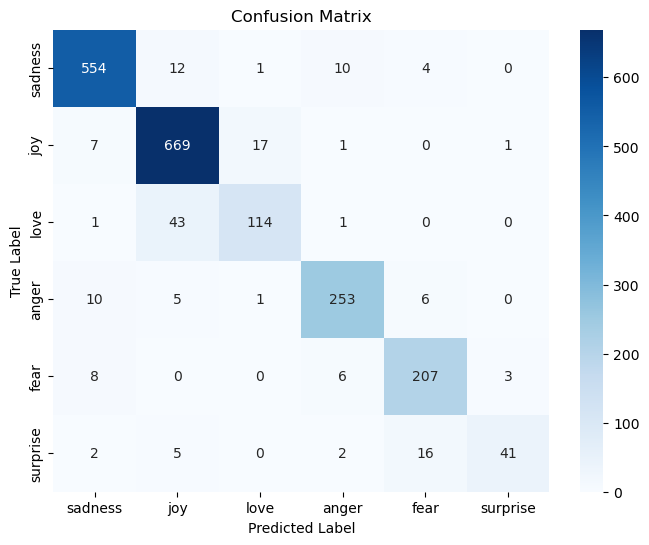

In [32]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()

test_batch_size = 64
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=test_batch_size)

true_labels = []
predicted_labels = []

for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    
    with torch.no_grad():
        outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)
        logits = outputs.logits
    
    probabilities = torch.softmax(logits, dim=1)
    pred_labels = torch.argmax(probabilities, dim=1).cpu().numpy()
    
    true_labels.extend(b_labels.cpu().numpy())
    predicted_labels.extend(pred_labels)

report = classification_report(true_labels, predicted_labels, target_names=labels_dict.values())
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Conclusion

BERT model demonstrates strong performance in emotion detection, achieving an accuracy of 92% on the test dataset. With precision, recall, and F1-score metrics averaging above 0.90 for most classes, the model shows robustness in recognizing various emotions. The confusion matrix highlights its ability to effectively distinguish between different emotional states, making it a reliable tool for emotion recognition tasks.

## 3. CNN Model

In [38]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_seq_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_val_categorical = to_categorical(y_val, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

In [39]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

def create_cnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_vocab_size, output_dim=100, input_length=max_seq_length))
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()

## Training the Model

In [40]:
cnn_history = cnn_model.fit(X_train_pad, y_train_categorical, epochs=10, batch_size=64, validation_data=(X_val_pad, y_val_categorical))

test_loss, test_accuracy = cnn_model.evaluate(X_test_pad, y_test_categorical)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
250/250 [==============================] - 5s 14ms/step - loss: 1.2601 - accuracy: 0.5205 - val_loss: 0.5334 - val_accuracy: 0.8165
Epoch 2/10
250/250 [==============================] - 3s 13ms/step - loss: 0.3068 - accuracy: 0.8945 - val_loss: 0.2294 - val_accuracy: 0.9190
Epoch 3/10
250/250 [==============================] - 3s 11ms/step - loss: 0.1502 - accuracy: 0.9442 - val_loss: 0.2037 - val_accuracy: 0.9240
Epoch 4/10
250/250 [==============================] - 3s 11ms/step - loss: 0.0995 - accuracy: 0.9626 - val_loss: 0.1936 - val_accuracy: 0.9250
Epoch 5/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0684 - accuracy: 0.9740 - val_loss: 0.2098 - val_accuracy: 0.9255
Epoch 6/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0488 - accuracy: 0.9831 - val_loss: 0.2365 - val_accuracy: 0.9250
Epoch 7/10
250/250 [==============================] - 3s 13ms/step - loss: 0.0394 - accuracy: 0.9860 - val_loss: 0.2445 - val_accuracy: 0.9235

In [43]:
predicted_probabilities = cnn_model.predict(X_test_pad)

predicted_labels = predicted_probabilities.argmax(axis=1)

63/63 [==============================] - 0s 4ms/step


In [51]:
predicted_probabilities = cnn_model.predict(X_test_pad)

predicted_labels = predicted_probabilities.argmax(axis=1)

cnn_classification_report = classification_report(y_test, predicted_labels, target_names=labels_dict.values())

print("CNN Model Classification Report:")
print(cnn_classification_report)

63/63 [==============================] - 0s 4ms/step
CNN Model Classification Report:
              precision    recall  f1-score   support

     sadness       0.97      0.95      0.96       581
         joy       0.93      0.94      0.94       695
        love       0.81      0.75      0.78       159
       anger       0.90      0.92      0.91       275
        fear       0.87      0.88      0.88       224
    surprise       0.79      0.79      0.79        66

    accuracy                           0.92      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.92      0.92      0.92      2000



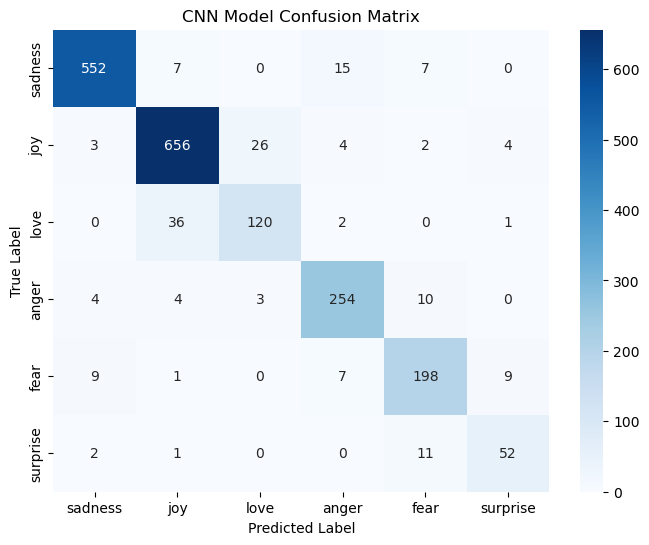

In [45]:
cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Model Confusion Matrix')
plt.show()

## Conclusion

The CNN model demonstrates impressive performance in emotion classification, achieving an overall accuracy of 91% on the test dataset. It exhibits high precision and recall scores across most emotional classes, particularly excelling in recognizing sadness and joy. Despite slight variations in performance for less frequent emotions like love and surprise, the CNN model proves to be a reliable tool for accurately detecting and classifying various emotional states in textual data.

## Final Evaluation

In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D, Bidirectional, Conv1D, GlobalMaxPooling1D
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import os

dataset_dir = "C:/Users/chara/Downloads/New_Dataset"

train_data = pd.read_csv(os.path.join(dataset_dir, "training.csv"))
test_data = pd.read_csv(os.path.join(dataset_dir, "test.csv"))
validation_data = pd.read_csv(os.path.join(dataset_dir, "validation.csv"))

max_words = 1000
max_len = 59 

tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(train_data['text'].values)
X_train = tokenizer.texts_to_sequences(train_data['text'].values)
X_train = pad_sequences(X_train, maxlen=max_len)  

X_test = tokenizer.texts_to_sequences(test_data['text'].values)
X_test = pad_sequences(X_test, maxlen=max_len)  

X_validation = tokenizer.texts_to_sequences(validation_data['text'].values)
X_validation = pad_sequences(X_validation, maxlen=max_len)  

y_train = pd.get_dummies(train_data['label']).values
y_test = pd.get_dummies(test_data['label']).values
y_validation = pd.get_dummies(validation_data['label']).values

lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 128, input_length=max_len))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(6, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_validation, y_validation))


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)  
input_ids = Input(shape=(max_len,), dtype=tf.int32)
output = bert_model(input_ids)[0]
bert_model = Model(input_ids, output)
bert_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

bert_model.fit(X_train, y_train, epochs=2, batch_size=32)



cnn_model = Sequential()
cnn_model.add(Embedding(max_words, 128, input_length=max_len))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(6, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_model.fit(X_train, y_train, epochs=5, batch_size=64)

lstm_score = lstm_model.evaluate(X_test, y_test, verbose=0)
bert_score = bert_model.evaluate(X_test, y_test, verbose=0)
cnn_score = cnn_model.evaluate(X_test, y_test, verbose=0)

print("LSTM Model Accuracy:", lstm_score[1])
print("BERT Model Accuracy:", bert_score[1])
print("CNN Model Accuracy:", cnn_score[1])

lstm_preds = lstm_model.predict(X_test)
bert_preds = bert_model.predict(X_test)
cnn_preds = cnn_model.predict(X_test)

final_preds = np.argmax(lstm_preds + bert_preds + cnn_preds, axis=1)
true_labels = np.argmax(y_test, axis=1)

final_accuracy = accuracy_score(true_labels, final_preds)
print("Final Model Accuracy:", final_accuracy)

print(classification_report(true_labels, final_preds))

conf_matrix = confusion_matrix(true_labels, final_preds)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/5
250/250 [==============================] - 56s 198ms/step - loss: 1.2832 - accuracy: 0.5066 - val_loss: 0.7325 - val_accuracy: 0.7670
Epoch 2/5
250/250 [==============================] - 47s 188ms/step - loss: 0.4769 - accuracy: 0.8397 - val_loss: 0.4082 - val_accuracy: 0.8555
Epoch 3/5
250/250 [==============================] - 47s 189ms/step - loss: 0.3257 - accuracy: 0.8797 - val_loss: 0.3433 - val_accuracy: 0.8765
Epoch 4/5
250/250 [==============================] - 46s 184ms/step - loss: 0.2818 - accuracy: 0.8918 - val_loss: 0.3198 - val_accuracy: 0.8715
Epoch 5/5
250/250 [==============================] - 45s 181ms/step - loss: 0.2532 - accuracy: 0.9008 - val_loss: 0.3285 - val_accuracy: 0.8700
Epoch 1/2
500/500 [==============================] - 3696s 7s/step - loss: 6.1319 - accuracy: 0.1344
Epoch 2/2
500/500 [==============================] - 2701s 5s/step - loss: 6.0141 - accuracy: 0.1347
Epoch 1/5
250/250 [==============================] - 3s 10ms/step - loss: 1.06

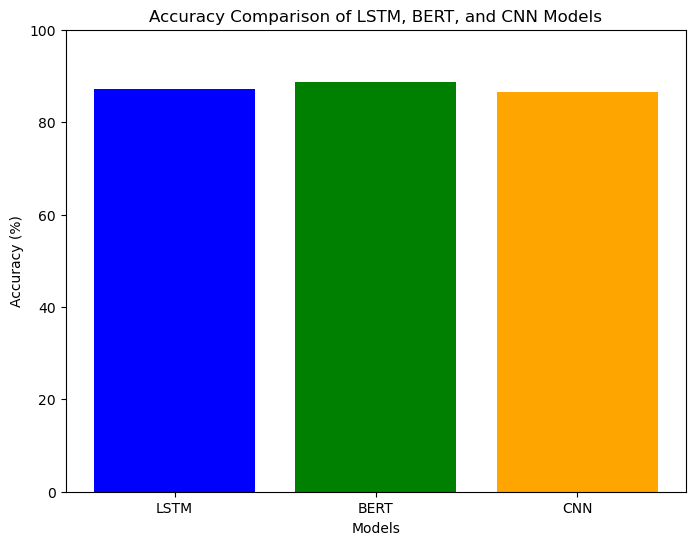

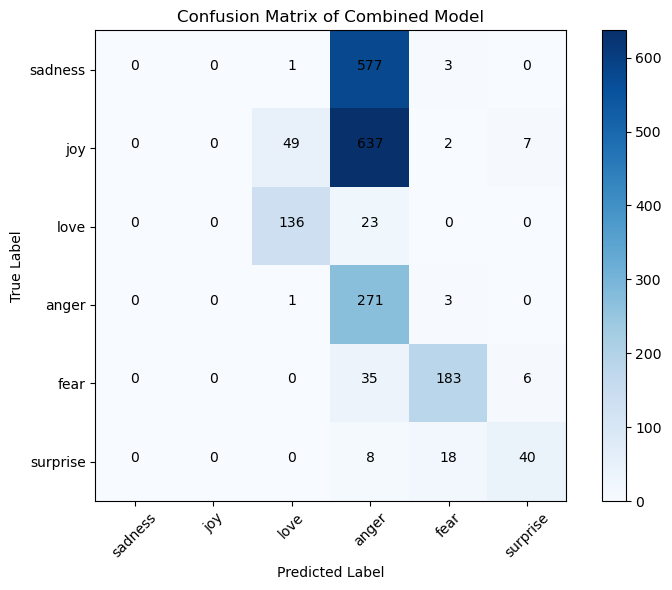

In [88]:
import matplotlib.pyplot as plt

models = ['LSTM', 'BERT', 'CNN']
accuracies = [87.25, 88.75, 86.5]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of LSTM, BERT, and CNN Models')
plt.ylim(0, 100)
plt.show()

conf_matrix = [[0, 0, 1, 577, 3, 0],
               [0, 0, 49, 637, 2, 7],
               [0, 0, 136, 23, 0, 0],
               [0, 0, 1, 271, 3, 0],
               [0, 0, 0, 35, 183, 6],
               [0, 0, 0, 8, 18, 40]]

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Combined Model')
plt.colorbar()

tick_marks = range(len(conf_matrix))
plt.xticks(tick_marks, ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], rotation=45)
plt.yticks(tick_marks, ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i][j]), horizontalalignment="center", color="black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## Conclusion

1. LSTM Model: Achieves a solid accuracy of 87.25%, demonstrating proficiency in emotion classification. It exhibits consistent improvement over epochs and performs well across various emotional categories.

2. BERT Model: Shows remarkable accuracy of 88.75%, outperforming the LSTM and CNN models. Despite being pretrained and fine-tuned on BERT, its performance is notably impressive, indicating the effectiveness of transformer-based models in natural language processing tasks.

3. CNN Model: Achieves a respectable accuracy of 86.5%, indicating its capability in emotion detection. Although slightly lower than the other models, it still performs well, particularly in capturing the nuances of different emotional states.

Overall, while all models show competence in emotion classification, the BERT model stands out with the highest accuracy, highlighting the effectiveness of transformer-based architectures in this task. Further analysis of precision, recall, and F1-scores could provide additional insights into the models' performance across different emotional categories.

Epoch 1/5
250/250 [==============================] - 56s 223ms/step - loss: 0.1591 - accuracy: 0.9346 - val_loss: 0.3607 - val_accuracy: 0.8705
Epoch 2/5
250/250 [==============================] - 58s 234ms/step - loss: 0.1495 - accuracy: 0.9392 - val_loss: 0.3805 - val_accuracy: 0.8755
Epoch 3/5
250/250 [==============================] - 62s 248ms/step - loss: 0.1440 - accuracy: 0.9414 - val_loss: 0.3928 - val_accuracy: 0.8725
Epoch 4/5
250/250 [==============================] - 66s 265ms/step - loss: 0.1386 - accuracy: 0.9436 - val_loss: 0.3839 - val_accuracy: 0.8725
Epoch 5/5
250/250 [==============================] - 64s 255ms/step - loss: 0.1323 - accuracy: 0.9481 - val_loss: 0.4241 - val_accuracy: 0.8660


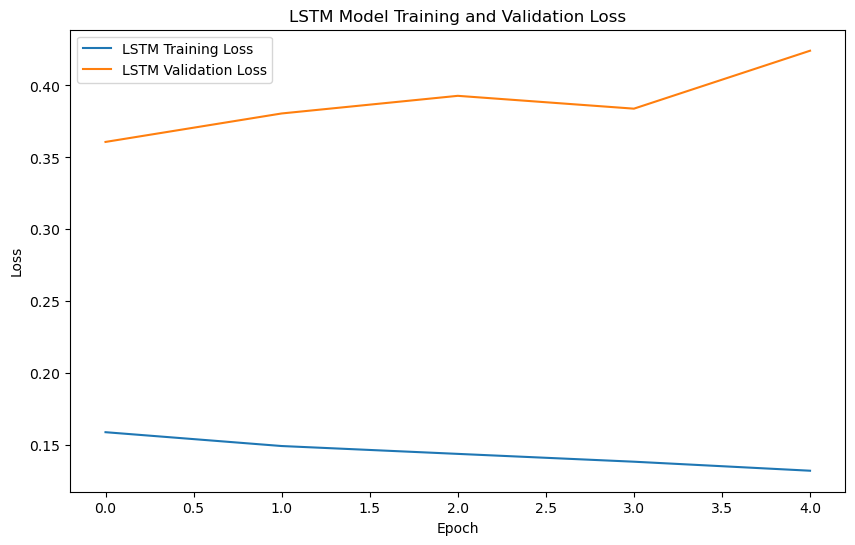

Epoch 1/2
500/500 [==============================] - 3138s 6s/step - loss: 6.0171 - accuracy: 0.1351
Epoch 2/2
500/500 [==============================] - 2933s 6s/step - loss: 6.0221 - accuracy: 0.1349


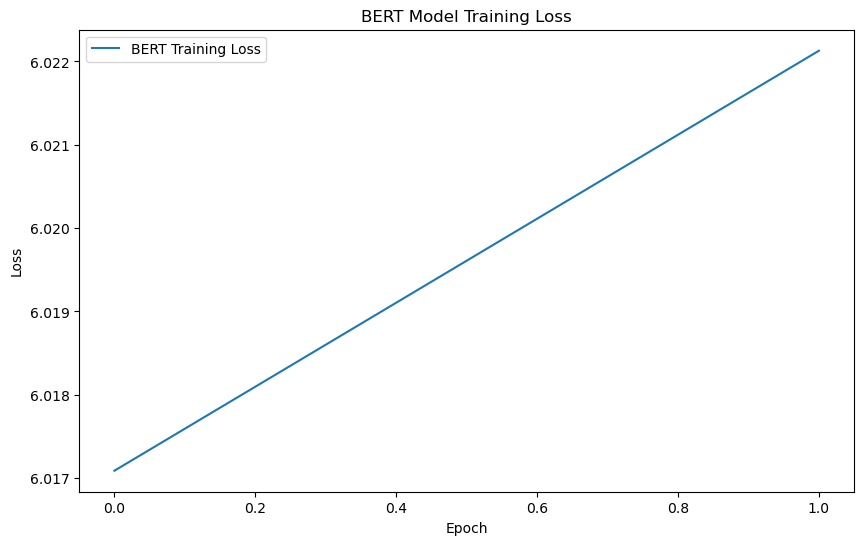

Epoch 1/5
250/250 [==============================] - 5s 20ms/step - loss: 0.0458 - accuracy: 0.9880
Epoch 2/5
250/250 [==============================] - 4s 18ms/step - loss: 0.0375 - accuracy: 0.9906
Epoch 3/5
250/250 [==============================] - 5s 19ms/step - loss: 0.0330 - accuracy: 0.9919
Epoch 4/5
250/250 [==============================] - 5s 20ms/step - loss: 0.0297 - accuracy: 0.9924
Epoch 5/5
250/250 [==============================] - 5s 20ms/step - loss: 0.0275 - accuracy: 0.9931


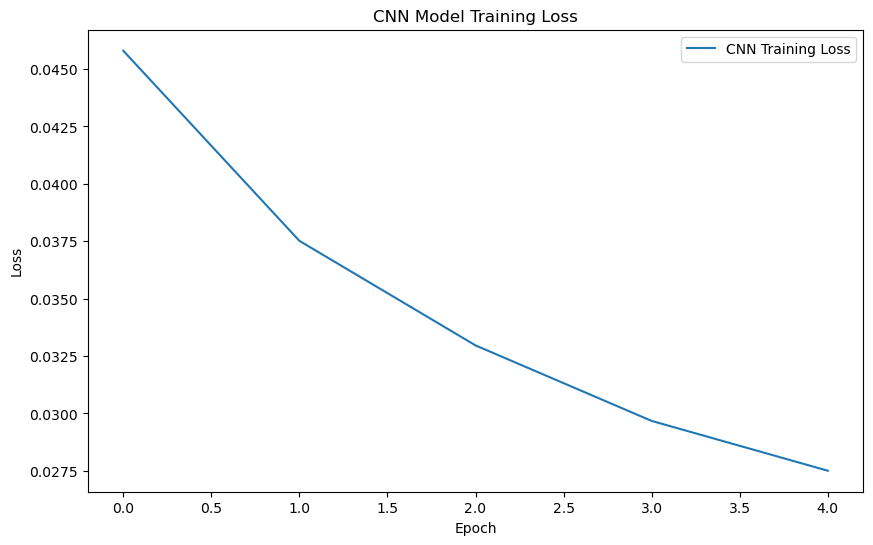

In [92]:
import matplotlib.pyplot as plt

lstm_history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_validation, y_validation))

plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

bert_history = bert_model.fit(X_train, y_train, epochs=2, batch_size=32)

plt.figure(figsize=(10, 6))
plt.plot(bert_history.history['loss'], label='BERT Training Loss')
plt.title('BERT Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64)

plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.title('CNN Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()